In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("surveyofbodyfat.csv")

In [4]:
data

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [5]:
data.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [6]:
data.isna().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [7]:
data.dtypes

Density    float64
BodyFat    float64
Age          int64
Weight     float64
Height     float64
Neck       float64
Chest      float64
Abdomen    float64
Hip        float64
Thigh      float64
Knee       float64
Ankle      float64
Biceps     float64
Forearm    float64
Wrist      float64
dtype: object

In [24]:
data.describe()

,Density,BodyFat,Age,Weight,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055585,19.150794,44.884921,178.456548,37.967808,100.742163,92.428770,99.735268,59.328175,38.562500,23.038095,32.255605,28.675595,18.222222
std,0.018996,8.368740,12.602040,27.298420,2.301730,8.161876,10.293612,6.438057,4.962811,2.321649,1.403545,2.958537,1.962956,0.911143
min,0.997900,0.000000,22.000000,118.500000,31.862500,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,23.250000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,254.000000,43.962500,121.912500,121.450000,115.562500,71.875000,44.350000,27.000000,40.512500,34.050000,20.600000


In [8]:
from sklearn.feature_selection import mutual_info_regression

mi = pd.DataFrame(mutual_info_regression(data[data.columns.drop('BodyFat')],
                                         data[['BodyFat']]),
                  columns=['MI Scores'],
                  index=data.columns.drop('BodyFat'))
corr = pd.DataFrame(data[data.columns.drop('BodyFat')].corrwith(data['BodyFat']),
                    columns=['Correlation'])
s_corr = pd.DataFrame(data[data.columns.drop('BodyFat')].corrwith(data['BodyFat'],
                                                                  method='spearman'),
                      columns=['Spearman_Correlation'])


relation = mi.join(corr)
relation = relation.join(s_corr)
relation.sort_values(by='MI Scores', ascending=False)

,MI Scores,Correlation,Spearman_Correlation
Density,3.938882,-0.987782,-0.993404
Abdomen,0.588728,0.813432,0.816248
Chest,0.347987,0.702620,0.673999
Hip,0.313322,0.625201,0.612125
Weight,0.285540,0.612414,0.612869
Thigh,0.284738,0.559608,0.544957
Knee,0.221293,0.508665,0.489285
Biceps,0.193357,0.493271,0.493652
Neck,0.099094,0.490592,0.491252
Age,0.092309,0.291458,0.274691


In [9]:
# We can see the obvious correlations between the body fat percentage 
# and physical characteristics of body parts. Among them, it seems height shows very weak relation.

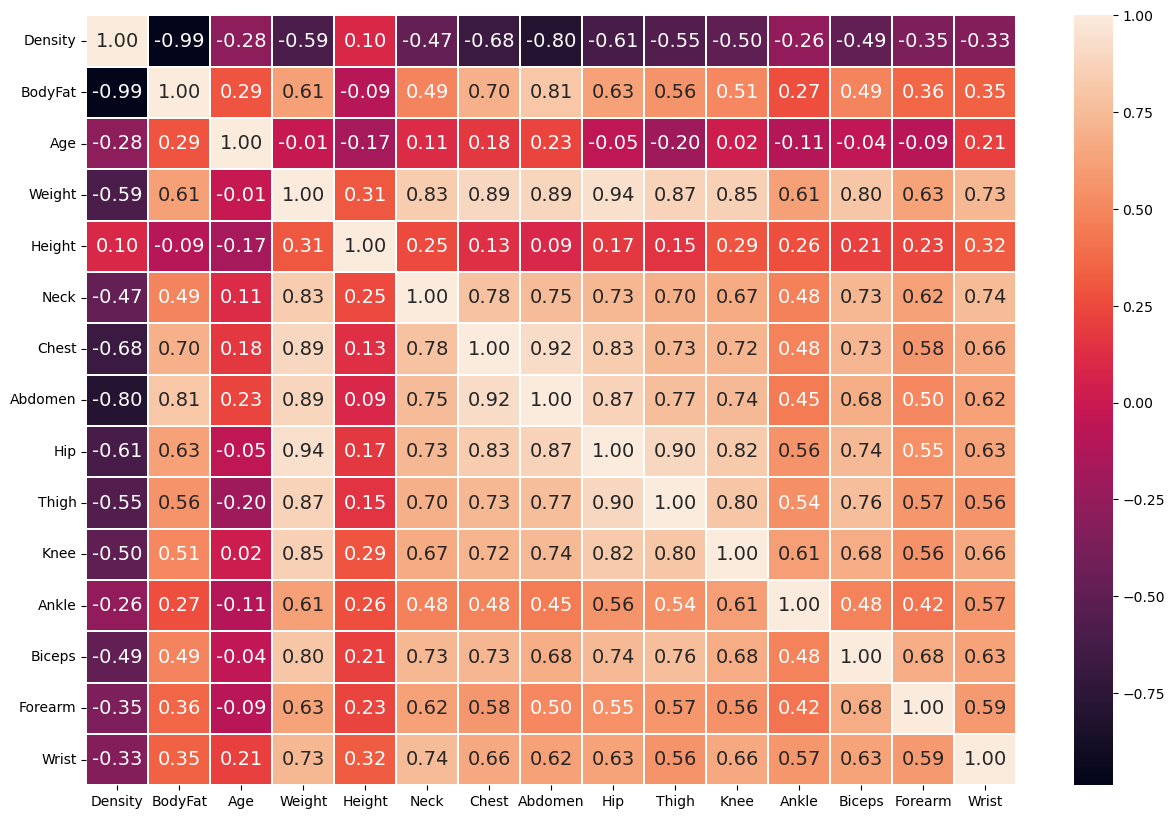

In [10]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot=True, linewidths=0.1, annot_kws={"fontsize":14}, fmt='.2f');

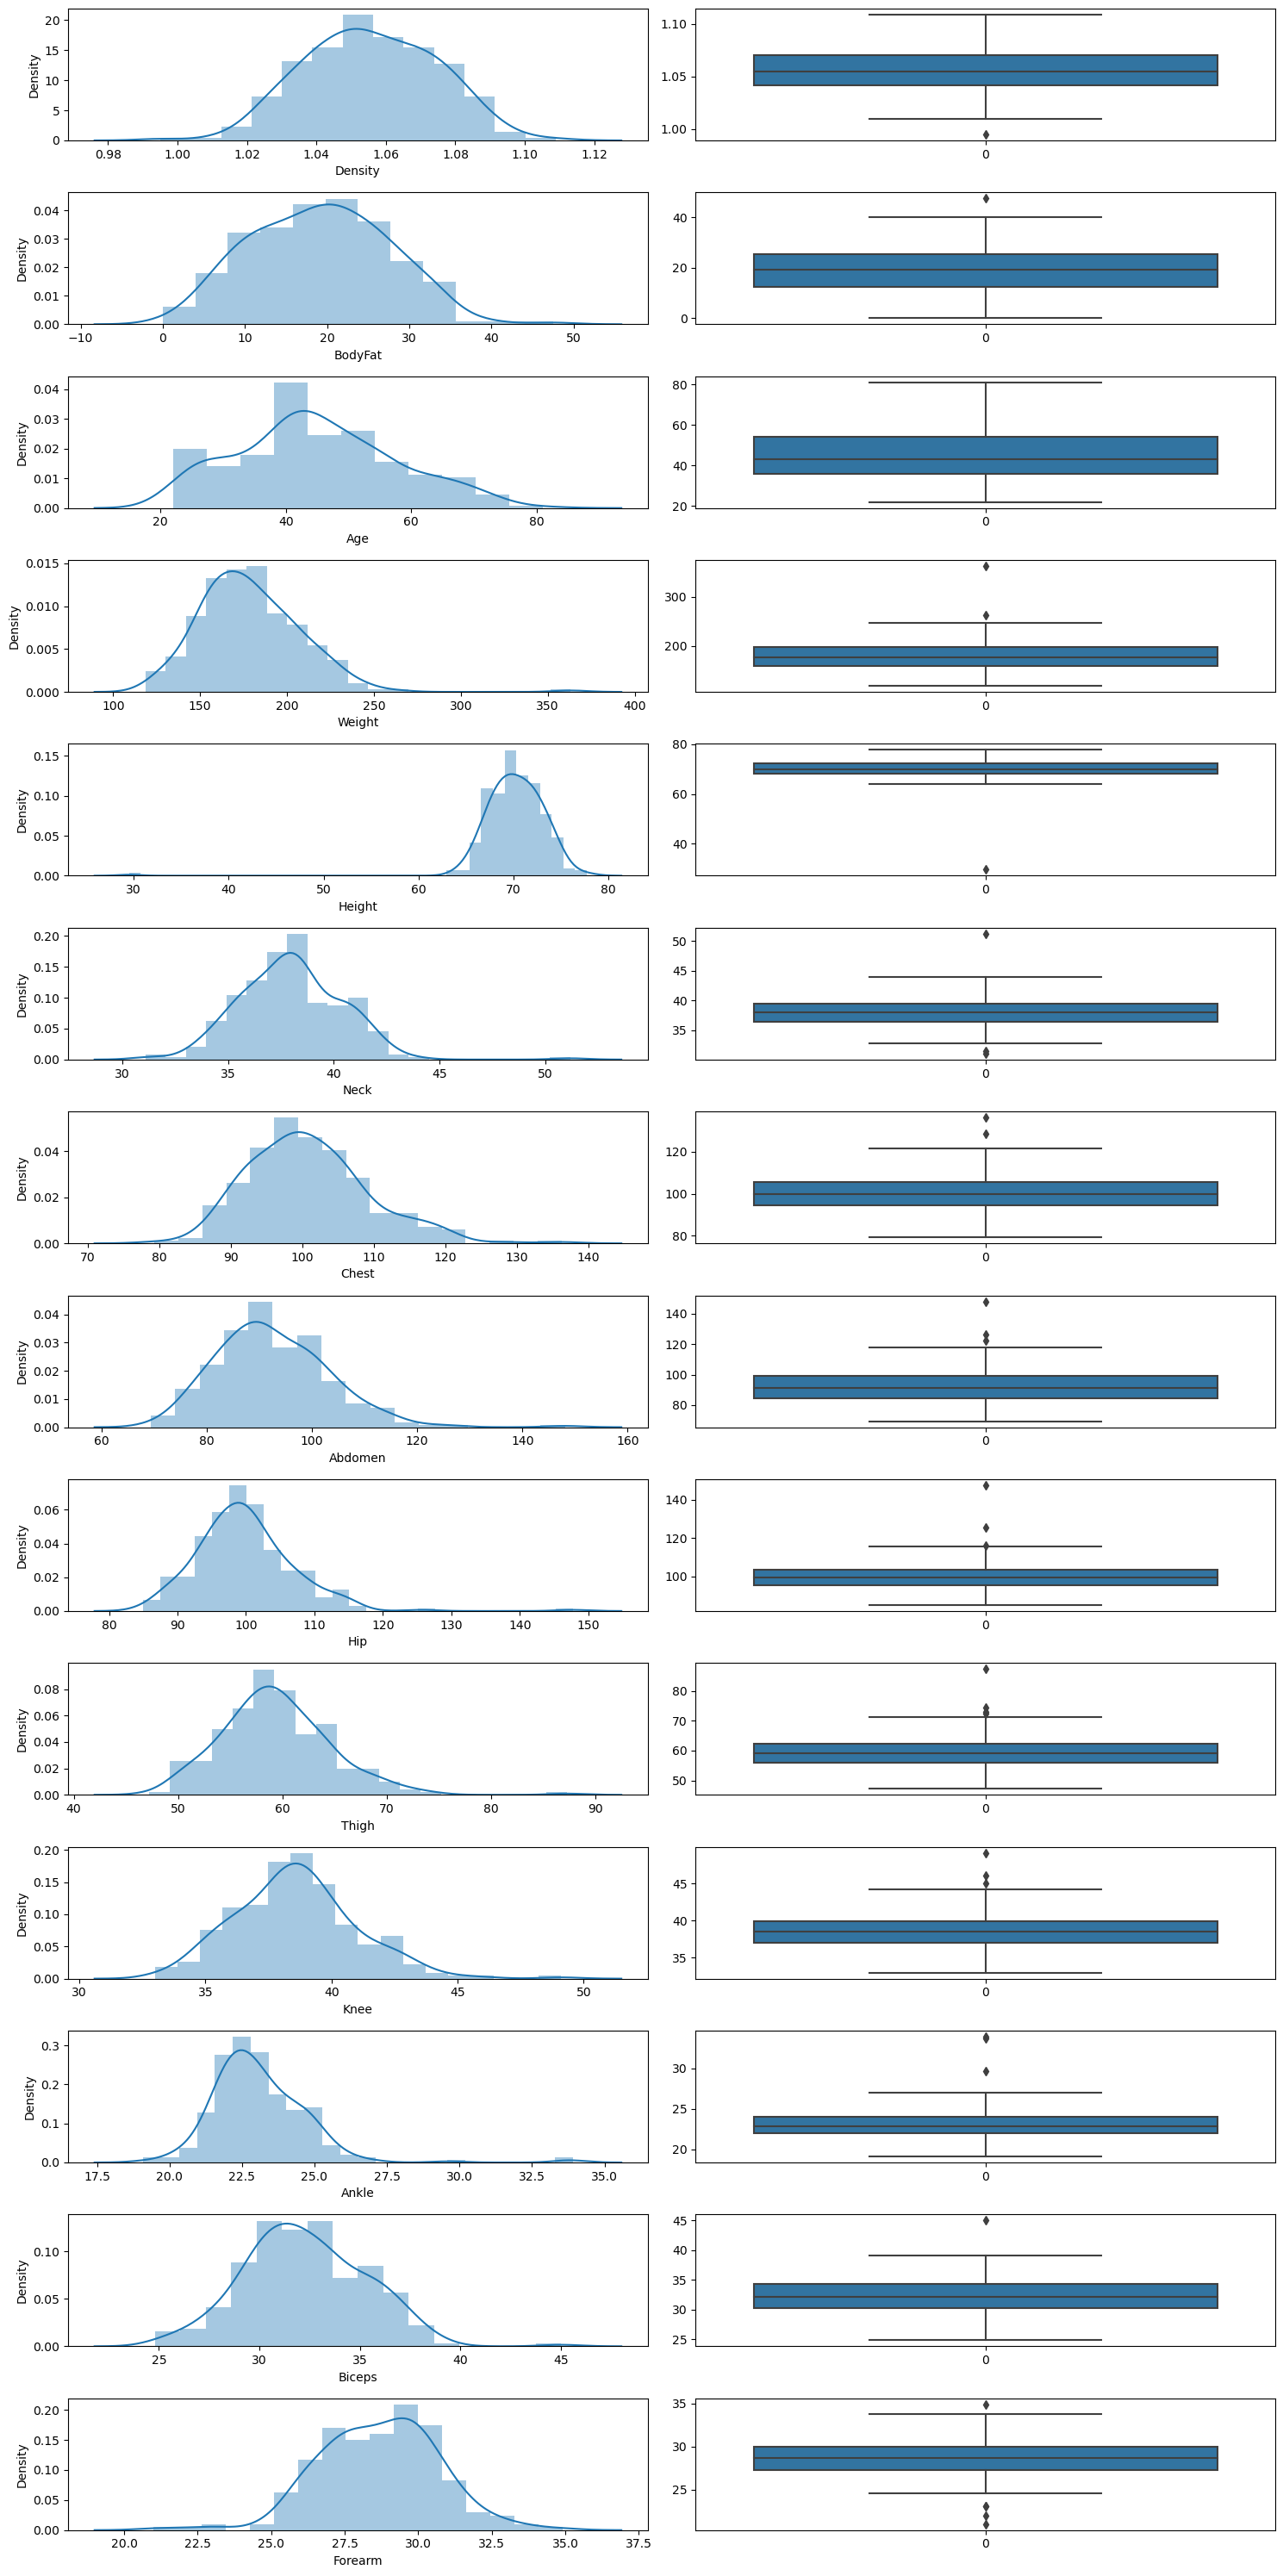

In [11]:
fig, ax = plt.subplots(14, 2, figsize=(15, 30))

for i, column in enumerate(data.columns[:14]): 
    sns.distplot(data[column], ax=ax[i, 0])
    sns.boxplot(data[column], ax=ax[i, 1])

fig.tight_layout()

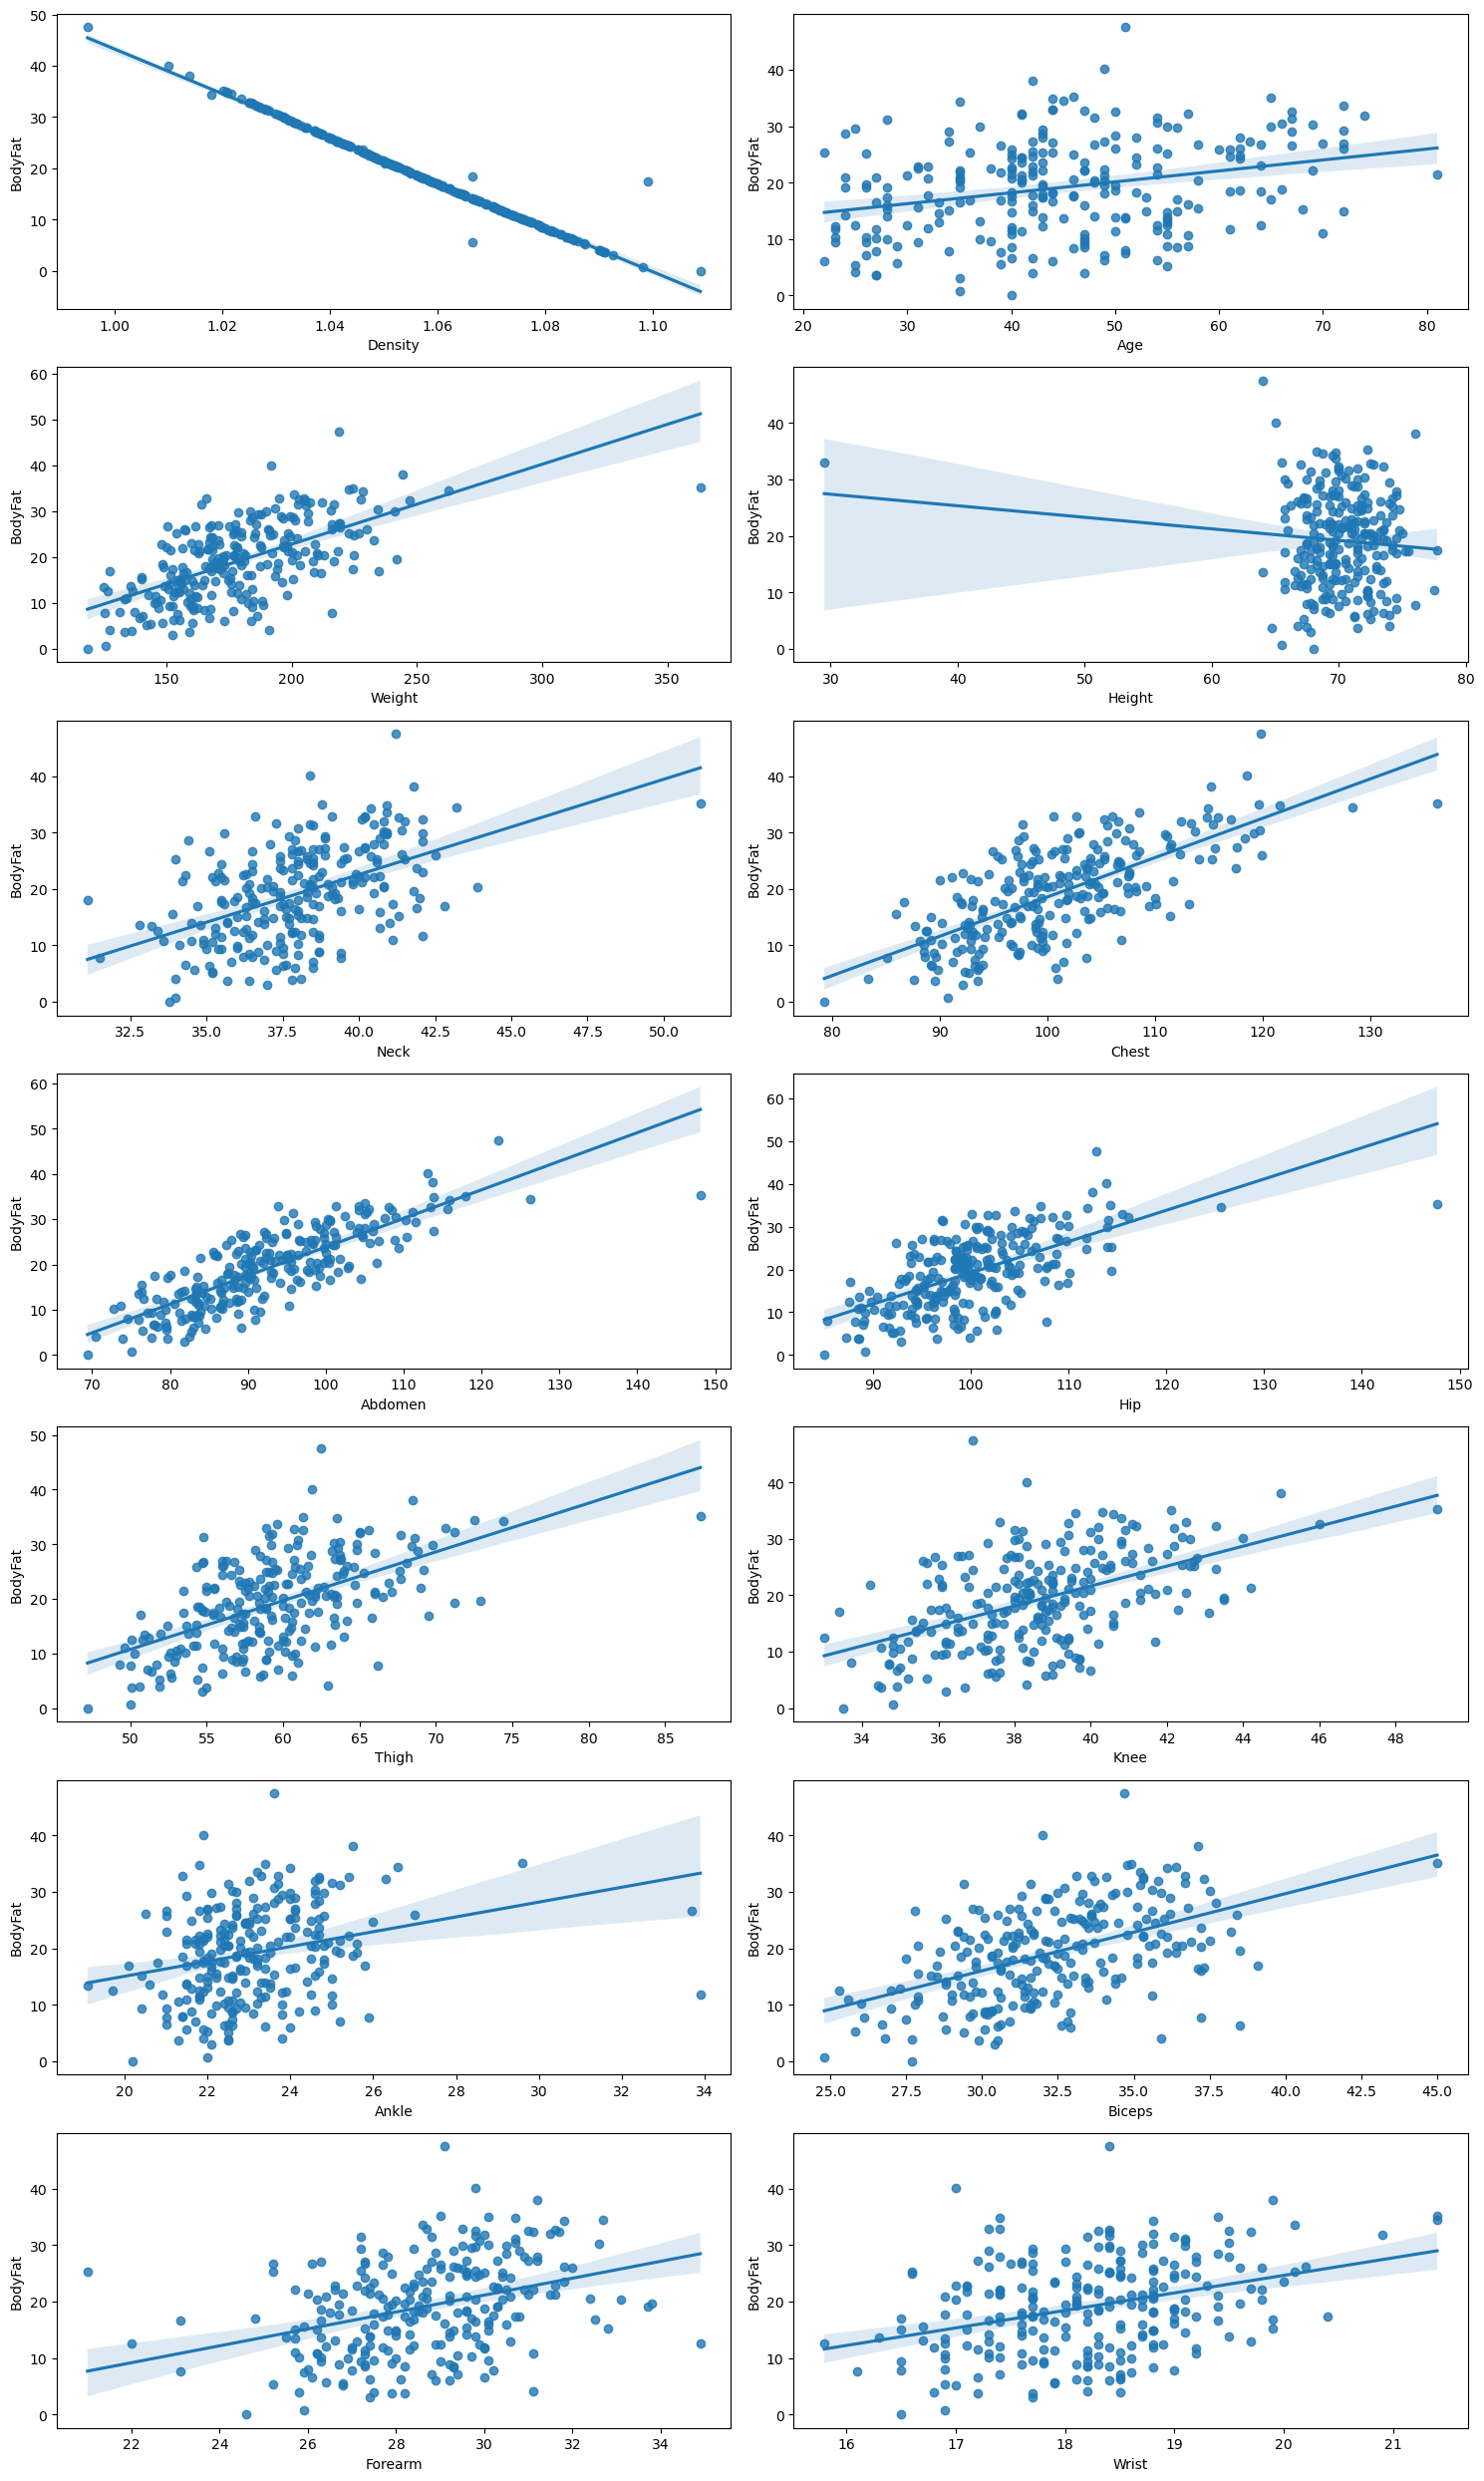

In [12]:
plt.figure(figsize=(15,25))

for i, column in enumerate(data.columns.drop('BodyFat')):
    plt.subplot(7, 2, i + 1)
    sns.regplot(data=data, x=column, y='BodyFat')
    
plt.tight_layout();

In [13]:
# I decided to drop Height column too.

In [14]:
data.drop('Height', axis=1, inplace=True)

In [15]:
# Now let's remove the outliers.
def remove_outlier(data, column_list):
    for col_name in column_list:
        q1 = data[col_name].quantile(0.25)
        q3 = data[col_name].quantile(0.75)
        iqr = q3 - q1
        low = q1 - iqr*1.5
        up = q3 + iqr*1.5
        data.loc[data[col_name] < low, col_name] = low
        data.loc[data[col_name] > up, col_name] = up
    
remove_outlier(data, data[data.columns.drop('BodyFat')])

In [16]:
from sklearn.model_selection import train_test_split

X = data.drop('BodyFat', axis=1)
y = data[['BodyFat']]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8)

In [17]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

X_scaled = pd.DataFrame(standard_scaler.fit_transform(X), columns=X.columns)
X_train = pd.DataFrame(standard_scaler.fit_transform(X_train), columns=X_train.columns)
X_valid = pd.DataFrame(standard_scaler.transform(X_valid), columns=X_valid.columns)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lr = LinearRegression()
rfr = RandomForestRegressor()
sgdr = SGDRegressor(eta0=0.001)
gbr = GradientBoostingRegressor()
xgbr = XGBRegressor()

models = [lr, rfr, sgdr, gbr, xgbr]
model_name = ['Linear Regression', 'Random Forest', 'Stochastic Gradient Descent',
              'Gradient Boosting', 'XGBoost']

mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, y_pred)
    mae_scores.append(mae)
    mse = mean_squared_error(y_valid, y_pred)
    mse_scores.append(mse)
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)
    r2_scoree = r2_score(y_valid, y_pred)
    r2_scores.append(r2_scoree)

In [22]:
models_scores = pd.DataFrame({'Model name':model_name,'R2 scores':r2_scores,'RMSE scores':rmse_scores, 'MSE scores':mse_scores,
                              'MAE scores':mae_scores })
models_scores.sort_values(ascending=False , by='R2 scores').round(3)

,Model name,R2 scores,RMSE scores,MSE scores,MAE scores
0,Linear Regression,0.972,1.446,2.090,0.686
2,Stochastic Gradient Descent,0.968,1.524,2.322,1.014
1,Random Forest,0.961,1.701,2.894,0.600
3,Gradient Boosting,0.950,1.913,3.659,0.646
4,XGBoost,0.924,2.366,5.597,0.927
